# Исследование надежности заемщиков


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt

try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [2]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

In [4]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

In [5]:
petcent_of_missing_data_days_employed = data['days_employed'].isna().sum()/len(data['days_employed'])
petcent_of_missing_data_total_income = data['total_income'].isna().sum()/len(data['total_income'])
print(f'Процент пропуска данных в общием трудовом стаже в днях: {petcent_of_missing_data_days_employed:.0%}')
print(f'Процент пропуска данных в ежемесячном доходе: {petcent_of_missing_data_total_income:.0%}')

Процент пропуска данных в общием трудовом стаже в днях: 10%
Процент пропуска данных в ежемесячном доходе: 10%


In [6]:
#Проверяем данные с пропуском в столбце общего трудового стажа в днях
data.loc[data['days_employed'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [7]:
#Проверяем данные с пропуском в столбце ежемесячного дохода
data.loc[data['total_income'].isna()]

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
12,0,NaN,65,среднее,1,гражданский брак,1,M,пенсионер,0,NaN,сыграть свадьбу
26,0,NaN,41,среднее,1,женат / замужем,0,M,госслужащий,0,NaN,образование
29,0,NaN,63,среднее,1,Не женат / не замужем,4,F,пенсионер,0,NaN,строительство жилой недвижимости
41,0,NaN,50,среднее,1,женат / замужем,0,F,госслужащий,0,NaN,сделка с подержанным автомобилем
55,0,NaN,54,среднее,1,гражданский брак,1,F,пенсионер,1,NaN,сыграть свадьбу
...,...,...,...,...,...,...,...,...,...,...,...,...
21489,2,NaN,47,Среднее,1,женат / замужем,0,M,компаньон,0,NaN,сделка с автомобилем
21495,1,NaN,50,среднее,1,гражданский брак,1,F,сотрудник,0,NaN,свадьба
21497,0,NaN,48,ВЫСШЕЕ,0,женат / замужем,0,F,компаньон,0,NaN,строительство недвижимости
21502,1,NaN,42,среднее,1,женат / замужем,0,F,сотрудник,0,NaN,строительство жилой недвижимости


In [8]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

In [9]:
data['days_employed'] = data['days_employed'].abs()

In [10]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть. Тем более этот столбец не понадобится вам для исследования.

In [11]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [12]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [13]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

### Удаление пропусков (продолжение)

In [14]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [15]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

In [16]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

In [17]:
data['education'] = data['education'].str.lower()

In [18]:
data.duplicated().sum()

71

In [19]:
data = data.drop_duplicates()

### Категоризация данных

In [20]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [21]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

In [22]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

In [23]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [24]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

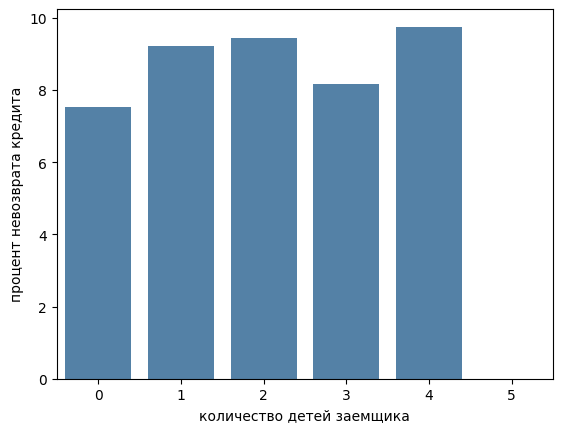

In [25]:
#находим процент невозврата кредита по заемщикам, сгруппированным по количеству детей
children_debt_percent = (data.groupby('children')['debt'].sum() / data.groupby('children')['children'].count()*100)
children_debt_percent = children_debt_percent.reset_index()
children_debt_percent.columns = ['children', 'children_debt_percent']

#строим график процента невозврата кредита по заемщикам, сгруппированным по количеству детей
plot_children_status_debt = sns.barplot(y='children_debt_percent', x='children', data = children_debt_percent, color='steelblue')
plot_children_status_debt.set(ylabel='процент невозврата кредита', xlabel='количество детей заемщика')
plt.show()

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Комментарий ревьюера  ✔️</h2>
    
Здорово, что стараешься визуализировать результаты. Хорошим тоном является наличие заголовка и подписей осей. Но это еще будет в курсе. 


Обрати внимание на то, что ты делишь сумму на количество, а это не что иное, как среднее. Действия у тебя верные. В столбце `debt` единицами обозначено наличие задолженности. Нулем — ее отсутствие. Так, сумма столбца будет равна сумме единичек или числу должников, а применение метода **count** вернет общее количество кредитов. Таким образом, для поиска доли должников надо разделить сумму на количество. Можно это сделать в одной группировке:
</div>

In [26]:
# КОД РЕВЬЮЕРА

data.groupby('children')['debt'].agg(['count','sum','mean'])

,count,sum,mean
children,,,
0,14091,1063,0.075438
1,4808,444,0.092346
2,2052,194,0.094542
3,330,27,0.081818
4,41,4,0.097561
5,9,0,0.000000


In [27]:
# КОД РЕВЬЮЕРА

def my_mean(x): return x.mean()*100

# В кач-ве агрегирования можно любую функцию брать.
data.groupby('children')['debt'].agg(['count', 'sum', my_mean])

,count,sum,my_mean
children,,,
0,14091,1063,7.543822
1,4808,444,9.234609
2,2052,194,9.454191
3,330,27,8.181818
4,41,4,9.756098
5,9,0,0.000000


In [28]:
# КОД РЕВЬЮЕРА

def my_mean(x): return '{:.2%} '.format(x.mean())

data.groupby('children')['debt'].agg(['count', 'sum', my_mean])

,count,sum,my_mean
children,,,
0,14091,1063,7.54%
1,4808,444,9.23%
2,2052,194,9.45%
3,330,27,8.18%
4,41,4,9.76%
5,9,0,0.00%


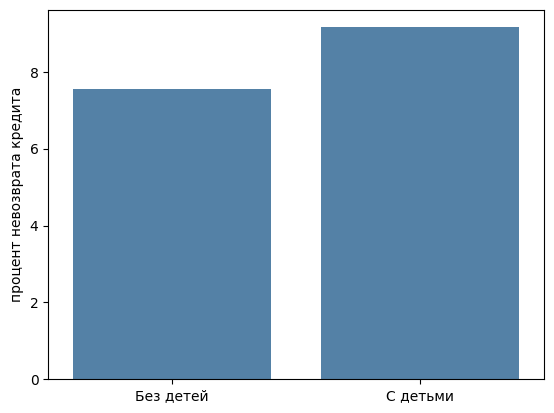

In [29]:
#находим процент невозврата кредита по заемщикам, сгруппированным по наличию детей
without_children_debt_percent = children_debt_percent['children_debt_percent'][0]
with_children_debt_percent = (children_debt_percent['children_debt_percent'][1]+children_debt_percent['children_debt_percent'][2]+children_debt_percent['children_debt_percent'][3]+children_debt_percent['children_debt_percent'][4])/4
data_children_debt_percent = {'Без детей': without_children_debt_percent, 'С детьми': with_children_debt_percent}

#строим график процента невозврата кредита по заемщикам, сгруппированным по наличию детей
plot_children_status_debt = sns.barplot(x = ['Без детей', 'С детьми'], y = [without_children_debt_percent, with_children_debt_percent], color='steelblue')
plot_children_status_debt.set(ylabel='процент невозврата кредита')
plt.show()

In [30]:
amount_without_children = data.loc[data.loc[:,'children'] == 0]['children'].count()
amount_with_children = data.loc[data.loc[:,'children'] != 0]['children'].count()

print(f'Число заемщиков без детей: {amount_without_children}, средний процент невозврата кредита {without_children_debt_percent/100:.2%}')
print(f'Число заемщиков c детьми: {amount_with_children}, средний процент невозврата кредита {with_children_debt_percent/100:.2%}')

Число заемщиков без детей: 14091, средний процент невозврата кредита 7.54%
Число заемщиков c детьми: 7240, средний процент невозврата кредита 9.16%


**Вывод: В ходе изучения данных было установлено что наиболее многочисленна группа заемщиков - группа заемщиков без детей. Если исключить малочисленную группу заемщиков с 5 детьми, то возврат процент невозврата кредита меньше всего группе заемщиков без детей, также процент невозврата кредита относительно небольшой в группе заемщиков с 3 детьми. Повышенный процент невозврата кредита наблюдается в группах замщиков с 1, 2 и 4 детьми. Исходя из данных нельзя вывести зависимость процента невозврата кредита от количества детей заемщика если у заемщика есть дети. При этом можно утверждать что в группе заемщиков без детей процент невозврата кредита меньше чем в группе заемщиков с детьми.**

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

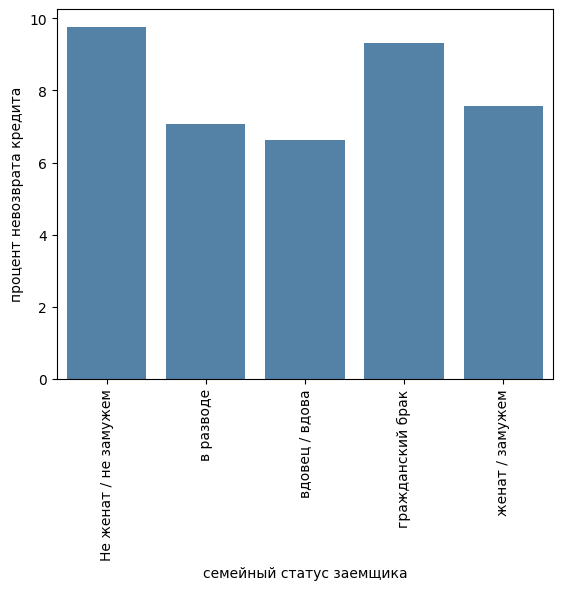

In [31]:
#находим процент невозврата кредита по заемщикам, сгруппированным по семейному статусу заемщика
family_status_debt_percent = (data.groupby('family_status')['debt'].sum() / data.groupby('family_status')['family_status_id'].count()*100)
family_status_debt_percent = family_status_debt_percent.reset_index()
family_status_debt_percent.columns = ['family_status', 'family_status_debt_percent']

#строим график процента невозврата кредита по заемщикам, сгруппированным по семейному статусу заемщика
plot_family_status_debt = sns.barplot(y='family_status_debt_percent', x='family_status', data = family_status_debt_percent, color='steelblue')
plot_family_status_debt.set(ylabel='процент невозврата кредита', xlabel='семейный статус заемщика')
plt.xticks(rotation=90)
plt.show()

In [32]:
data.groupby('family_status')['debt'].agg(['count', my_mean])

,count,my_mean
family_status,,
Не женат / не замужем,2796,9.76%
в разводе,1189,7.06%
вдовец / вдова,951,6.62%
гражданский брак,4134,9.31%
женат / замужем,12261,7.56%


**Вывод: Исходя из данных пониженный процент невозврата кредита наблюдается в группах заемщиков, находящихся в разводе, вдовцов/вдов и женатых/замужем. Повышенный процент невозварта кредита наблюдается в группах заемщиков не женатых/не замужем, находящихся в гражданском браке. Можно следать вывод, что предпочтительные выдавать займы людям, находящимся в браке, либо уже прошедших через брак. По количественному анализу групп заемщиков выделяется многочисленная группа заемщиков находящихся в браке (женат/замужем).** 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

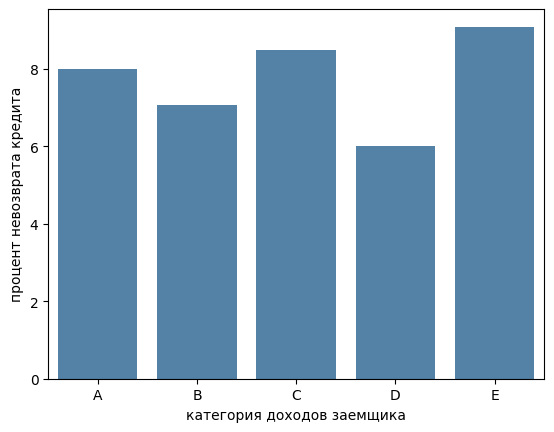

In [33]:
#находим процент невозврата кредита по заемщикам, сгруппированным по категории дохода заемщика
income_category_debt_percent = (data.groupby('total_income_category')['debt'].sum() / data.groupby('total_income_category')['total_income_category'].count()*100)
income_category_debt_percent = income_category_debt_percent.reset_index()
income_category_debt_percent.columns = ['total_income_category', 'income_category_debt_percent']

#строим график процента невозврата кредита по заемщикам, сгруппированным по категории дохода заемщика
plot_income_category_debt = sns.barplot(y='income_category_debt_percent', x='total_income_category', data = income_category_debt_percent, color='steelblue')
plot_income_category_debt.set(ylabel='процент невозврата кредита', xlabel='категория доходов заемщика')
plt.show()

In [34]:
data.groupby('total_income_category')['debt'].agg(['count', my_mean])

,count,my_mean
total_income_category,,
A,25,8.00%
B,5014,7.06%
C,15921,8.50%
D,349,6.02%
E,22,9.09%


**Вывод: Исходя из количественных данных по каждой группе заемщиков, из выборки можно убрать две малочиченнеые группы заемщиков (A и E), которые представляют из себя самую богатую группу заемщиков и самую бедную группу заемщиков соответственно. Самая многочисленная - группа людей со "средними доходами" (группа C). Группа С представляет собой ненадежную категорию замщиков. Более низкий процент невозврата кредита наблюдается в группах с доходами выше средних (группа B) и с доходами ниже средних (группа D).** 

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

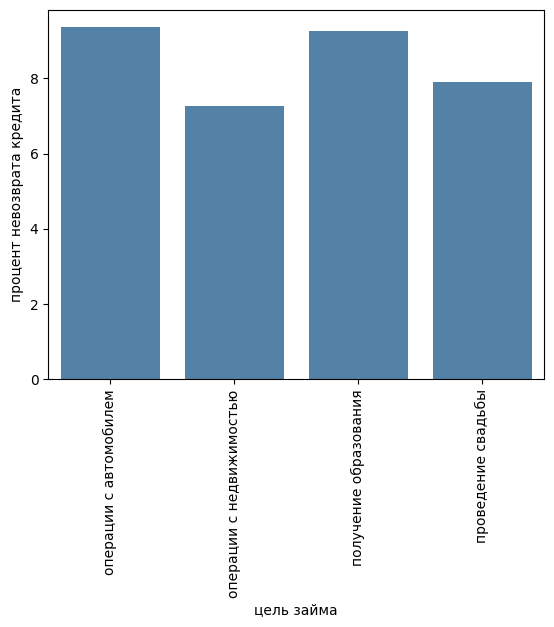

In [35]:
#находим процент невозврата кредита по заемщикам, сгруппированным по цели займа заемщика
purpose_category_debt_percent = (data.groupby('purpose_category')['debt'].sum() / data.groupby('purpose_category')['purpose_category'].count()*100)
purpose_category_debt_percent = purpose_category_debt_percent.reset_index()
purpose_category_debt_percent.columns = ['purpose_category', 'purpose_category_debt_percent']

#строим график процента невозврата кредита по заемщикам, сгруппированным по цели займа заемщика
plot_income_category_debt = sns.barplot(y='purpose_category_debt_percent', x='purpose_category', data = purpose_category_debt_percent, color='steelblue')
plot_income_category_debt.set(ylabel='процент невозврата кредита', xlabel='цель займа')
plt.xticks(rotation=90)
plt.show()

In [36]:
data.groupby('purpose_category')['debt'].agg(['count', my_mean])

,count,my_mean
purpose_category,,
операции с автомобилем,4279,9.35%
операции с недвижимостью,10751,7.26%
получение образования,3988,9.25%
проведение свадьбы,2313,7.91%


**Вывод: Группы людей берущих займы для проведения операций с недвижимостью и для проведения свадьбы обладают более низким процентом невозврата кредита. Самая многочесленная группа заемщиков - люди берущие займы для операций с недвижимостью.** 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ: Пропуски в исходных данных в колонках days_employed и total_income связаны между собой так, как количество пропусков по этим колонкам совпадает. Данные пропуски являются  случайными и скорее всего это может быть связано с ошибками при заполнении базы данных из источника данных.* 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ: Пропуски в количественных переменных лучше заполнять медианными значениями, найденными по каждой группе отдельно так, как мединные значение лучше предстваляют выборку. Средние арифметические значения может быть сильно искажено из-за аномальных значений.* 

### Шаг 4: общий вывод.

Для полноценного исследования надежности заемщиков (кредитного скоринга), необходимо делать более объемное иследование, проверяя гипотезы по всем группам заемщиков в комплексе. В рамках данного проекта были предобработаны данные для исследования и проверены некоторые гипотезы по отдельным группам заемщиков. Из результатов исследования были исключены малочисленные группы заемщиков, как непрезентативные.  
    
В ходе данного исследования были выявлены следующие результаты по группам заемщиков:    
 
* В исследовании по семейному положению заемщика самой надежной оказалась группа заемщиков без детей, процент невозврата кредита в срок - 7.54%. Самой ненадежной - группа заемщиков с 4 детьми, процент невозврата кредита в срок - 9.76%.
  
* В исследовании по количеству детей заемщика самой надежной оказалась группа овдовевших, процент невозврата кредита в срок - 6.62%. Самой ненадежной - группа не женатых / не бывших замужем заемщиков, процент невозврата кредита в срок - 9.76%. Также надежными оказались группы заемщиков находящихся в разводе (процент невозврата кредита в срок - 7.06%) и женатых / находящихся замужем (процент невозврата кредита в срок -7.56%).

* В исследовании по уровню доходов заемщика самой надежной оказалась группа D (доходы от 30001 до 50000), процент невозврата кредита в срок - 6.02%. Самой ненадежной - группа C (доходы от 50001 до 200000), процент невозврата кредита в срок - 8.50%.
    
* В исследовании по цели займа самой надежной оказалась группа заемщиков, совершающих операции с недвижимостью, процент невозврата кредита в срок - 7.26%. Самой ненадежной - группа заемщиков, совершающих операции с автомобилем, процент невозврата кредита в срок - 9.35%. Также надежной оказалась группа заемщиков берущих займы на проведение свадьбы (процент невозврата кредита в срок - 7.91%). Ненадежной оказалась группа заемщиков берущих займы на получение образования (процент невозврата кредита в срок - 9.25%).      

В дальнейшем возможно продолжить исследования, проверять более сложные гипотезы, используя сводные таблицы для сочетания нескольких параметров заемщиков.